In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [4]:

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Activation,Flatten
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D,Dropout

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
18/18 [==============================] - 6s 284ms/step - loss: 0.5580 - accuracy: 0.7622 - val_loss: 0.5298 - val_accuracy: 0.8125
Epoch 2/20
18/18 [==============================] - 5s 282ms/step - loss: 0.5404 - accuracy: 0.7902 - val_loss: 0.5296 - val_accuracy: 0.8125
Epoch 3/20
18/18 [==============================] - 5s 278ms/step - loss: 0.5438 - accuracy: 0.7902 - val_loss: 0.4850 - val_accuracy: 0.8125
Epoch 4/20
18/18 [==============================] - 5s 258ms/step - loss: 0.5271 - accuracy: 0.7902 - val_loss: 0.4834 - val_accuracy: 0.8125
Epoch 5/20
18/18 [==============================] - 5s 258ms/step - loss: 0.5319 - accuracy: 0.7902 - val_loss: 0.4865 - val_accuracy: 0.8125
Epoch 6/20
18/18 [==============================] - 5s 256ms/step - loss: 0.5178 - accuracy: 0.7902 - val_loss: 0.5100 - val_accuracy: 0.8125
Epoch 7/20
18/18 [==============================] - 5s 258ms/step - loss: 0.5304 - accuracy: 0.7902 - val_loss: 0.4876 - val_accuracy: 0.8125
Epoch 

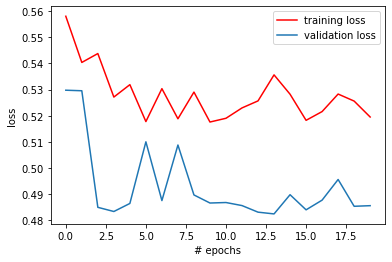

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

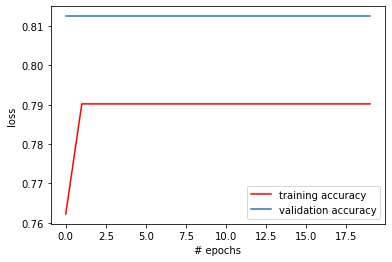

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 0s 44ms/step - loss: 0.4623 - accuracy: 0.8310
[0.4623214900493622, 0.8309859037399292]
